In [48]:
'''Importok'''
import pandas as pd
import numpy as np
#from sklearn import *

In [49]:
df = pd.read_csv('Hitelbiralat_p.csv',sep=";")
df.head()

ID_Client  ID_Shop Sex Marital_Status  Age  QUANT_DEPENDANTS  EDUCATION  \
0          1       22   F              O   44                 0        NaN   
1          2       15   F              S   18                 0        NaN   
2          3       24   F              C   22                 0        NaN   
3          4       12   F              C   47                 0        NaN   
4          5       16   F              S   28                 0        NaN   

  FLAG_RESIDENCIAL_PHONE  AREA_CODE_RESIDENCIAL_PHONE  PAYMENT_DAY  \
0                      N                           31           12   
1                      Y                           31           20   
2                      Y                           31            8   
3                      N                           31           25   
4                      Y                           31           25   

         ...         QUANT_BANKING_ACCOUNTS     PERSONAL_REFERENCE_1  \
0        ...                              0                     VERA   
1        ...                              0                     SARA   
2        ...                              0                   HELENA   
3        ...                              0                     JACI   
4        ...                              0  MARCIA CRISTINA ZANELLA   

        PERSONAL_REFERENCE_2 FLAG_MOBILE_PHONE FLAG_CONTACT_PHONE  \
0                      LUCIA                 N                  N   
1                     FELIPE                 N                  N   
2             DOMINGOS SOGRA                 N                  N   
3  VALERIA ALEXANDRA TRAJANO                 N                  N   
4         SANDRO L P MARTINS                 N                  N   

  PERSONAL_NET_INCOME COD_APPLICATION_BOOTH  \
0                 300                     0   
1                 300                     0   
2                 229                     0   
3                 304                     0   
4                 250                     0   

   QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION  FLAG_CARD_INSURANCE_OPTION  \
0                                          0                           N   
1                                          0                           N   
2                                          0                           N   
3                                          0                           N   
4                                          0                           N   

   TARGET_LABEL_BAD  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 32 columns]

In [50]:
df.dtypes

ID_Client                                      int64
ID_Shop                                        int64
Sex                                           object
Marital_Status                                object
Age                                            int64
QUANT_DEPENDANTS                               int64
EDUCATION                                    float64
FLAG_RESIDENCIAL_PHONE                        object
AREA_CODE_RESIDENCIAL_PHONE                    int64
PAYMENT_DAY                                    int64
SHOP_RANK                                      int64
RESIDENCE_TYPE                                object
MONTHS_IN_RESIDENCE                            int64
FLAG_MOTHERS_NAME                             object
FLAG_FATHERS_NAME                             object
FLAG_RESIDENCE_TOWN_WORKING_TOWN              object
FLAG_RESIDENCE_STATE_WORKING_STATE            object
MONTHS_IN_THE_JOB                              int64
PROFESSION_CODE                               

In [51]:
df['PERSONAL_NET_INCOME'].describe()

count       50000.000000
mean         8432.965427
std        448791.523022
min             0.000000
25%           270.000000
50%           400.000000
75%           741.000000
max      38529098.000000
Name: PERSONAL_NET_INCOME, dtype: float64

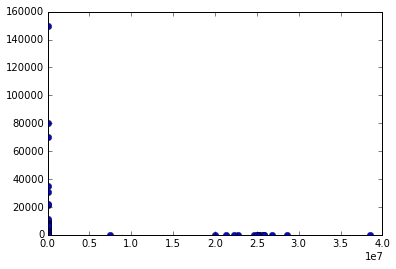

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df["PERSONAL_NET_INCOME"], df["MATE_INCOME"], 'o')

In [53]:
df["P_INCOME"]=df["PERSONAL_NET_INCOME"].apply(lambda x: 5000 if x > 5000 else x)
df["M_INCOME"]=df["MATE_INCOME"].apply(lambda x: 5000 if x > 5000 else x)
df["P_INCOME"]=df["P_INCOME"].fillna(0)

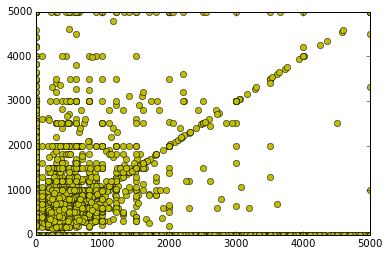

In [54]:
plt.plot(df["P_INCOME"], df["M_INCOME"], 'yo')

In [55]:
dataprep_df=df[["P_INCOME","Age"]]
dataprep_df.head()


P_INCOME  Age
0       300   44
1       300   18
2       229   22
3       304   47
4       250   28

In [56]:
#Binaris valtozo tisztitasa, helyzetbe hozasa

df["Sex_N"]= pd.Categorical(df['Sex']).codes
df.head()
df["Sex_N"].describe()

count    50000.000000
mean         0.303940
std          0.460092
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Sex_N, dtype: float64

In [57]:
df['Sex']=df['Sex'].fillna('F')

In [58]:
df["Sex_N"]= pd.Categorical(df['Sex']).codes
df.head()
df["Sex_N"].describe()

count    50000.000000
mean         0.304000
std          0.459987
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Sex_N, dtype: float64

In [59]:
dataprep_df["Sex_Flag"]=df["Sex_N"]
dataprep_df.head()

/home/rbalazs/jupiter3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


P_INCOME  Age  Sex_Flag
0       300   44         0
1       300   18         0
2       229   22         0
3       304   47         0
4       250   28         0

In [60]:
df.dtypes

ID_Client                                      int64
ID_Shop                                        int64
Sex                                           object
Marital_Status                                object
Age                                            int64
QUANT_DEPENDANTS                               int64
EDUCATION                                    float64
FLAG_RESIDENCIAL_PHONE                        object
AREA_CODE_RESIDENCIAL_PHONE                    int64
PAYMENT_DAY                                    int64
SHOP_RANK                                      int64
RESIDENCE_TYPE                                object
MONTHS_IN_RESIDENCE                            int64
FLAG_MOTHERS_NAME                             object
FLAG_FATHERS_NAME                             object
FLAG_RESIDENCE_TOWN_WORKING_TOWN              object
FLAG_RESIDENCE_STATE_WORKING_STATE            object
MONTHS_IN_THE_JOB                              int64
PROFESSION_CODE                               

In [61]:
for i in df['Marital_Status'].unique():
    dataprep_df['Marital_Status_'+str(i).lower()] = df['Marital_Status'].apply(lambda x: (x==i)+0)

/home/rbalazs/jupiter3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [62]:
dataprep_df.head()

P_INCOME  Age  Sex_Flag  Marital_Status_o  Marital_Status_s  \
0       300   44         0                 1                 0   
1       300   18         0                 0                 1   
2       229   22         0                 0                 0   
3       304   47         0                 0                 0   
4       250   28         0                 0                 1   

   Marital_Status_c  Marital_Status_v  Marital_Status_d  
0                 0                 0                 0  
1                 0                 0                 0  
2                 1                 0                 0  
3                 1                 0                 0  
4                 0                 0                 0

In [63]:
c='AREA_CODE_RESIDENCIAL_PHONE'
df[c].describe()

count    50000.000000
mean        33.790340
std         10.430367
min          1.000000
25%         31.000000
50%         31.000000
75%         31.000000
max         70.000000
Name: AREA_CODE_RESIDENCIAL_PHONE, dtype: float64

In [64]:
df[c].unique()

array([31, 23,  1, 27, 50,  5, 34, 33, 49, 24, 32, 68, 62, 38, 56, 29, 15,
       41, 42,  8, 46, 44, 45, 18,  6, 17, 12,  2, 14, 39, 54, 22, 43, 59,
       53, 26,  7, 52,  9, 37, 36, 35, 69, 25, 61, 10, 58,  3, 40, 19, 20,
       48, 67, 30, 13, 28, 11, 60, 21, 64, 51, 63, 47, 70, 57, 65,  4])

In [65]:
df[[c,"ID_Client"]].groupby( [c] ).count().sort(['ID_Client'],ascending=[0])


/home/rbalazs/jupiter3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


ID_Client
AREA_CODE_RESIDENCIAL_PHONE           
31                               35048
50                               11100
5                                 2475
23                                1000
24                                 120
49                                  48
32                                  33
27                                  27
42                                  14
38                                  12
52                                  12
56                                  10
68                                   7
11                                   7
33                                   6
43                                   5
26                                   4
2                                    3
34                                   3
41                                   3
48                                   3
1                                    3
7                                    3
8                                    3
69                                   2
6                                    2
9                                    2
67                                   2
62                                   2
12                                   2
...                                ...
61                                   1
60                                   1
53                                   1
54                                   1
59                                   1
58                                   1
47                                   1
35                                   1
45                                   1
44                                   1
3                                    1
4                                    1
10                                   1
13                                   1
14                                   1
15                                   1
17                                   1
18                                   1
19                                   1
20                                   1
21                                   1
22                                   1
25                                   1
28                                   1
29                                   1
30                                   1
36                                   1
39                                   1
40                                   1
70                                   1

[67 rows x 1 columns]

In [66]:
dataprep_df['Marital_Status_31'] = df['Marital_Status'].apply(lambda x: (x==31)+0)
dataprep_df['Marital_Status_50'] = df['Marital_Status'].apply(lambda x: (x==50)+0)
    

/home/rbalazs/jupiter3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/rbalazs/jupiter3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [67]:
dataprep_df.head()

P_INCOME  Age  Sex_Flag  Marital_Status_o  Marital_Status_s  \
0       300   44         0                 1                 0   
1       300   18         0                 0                 1   
2       229   22         0                 0                 0   
3       304   47         0                 0                 0   
4       250   28         0                 0                 1   

   Marital_Status_c  Marital_Status_v  Marital_Status_d  Marital_Status_31  \
0                 0                 0                 0                  0   
1                 0                 0                 0                  0   
2                 1                 0                 0                  0   
3                 1                 0                 0                  0   
4                 0                 0                 0                  0   

   Marital_Status_50  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [68]:
datascientist_name="CzipoBence"
dataprep_df.to_csv("dataprep_data_"+datascientist_name+".csv",index=False)